# eCommerce Product Recommendation - Part 3

# 1. Load Feature Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import keras
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Laioffer/csv_files/RecSys_eComm/

/content/drive/MyDrive/Laioffer/csv_files/RecSys_eComm


In [ ]:
ls

 aisles.csv                model_all_data.csv         order_products_train.csv
 departments.csv           model.png                  orders.csv
'model_all_data (1).csv'   order_products_prior.csv   products.csv


In [ ]:
model_all_data = pd.read_csv('model_all_data.csv')

In [ ]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,unique_key,label,user_product__total_orders,user_product__add_to_cart_order_mean,...,product__most_hod,product__days_since_prior_order_mean,product__aisle_id,product__department_id,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod
0,152610,30597,22,6,8,10.0,152610_30597,0,5,2.00,...,9,12.592593,53,16,26,408,10.953804,0.375,6,12
1,152610,15221,22,6,8,10.0,152610_15221,0,8,8.25,...,12,13.653846,84,16,26,408,10.953804,0.375,6,12
2,152610,43772,22,6,8,10.0,152610_43772,0,2,3.00,...,12,12.008565,83,4,26,408,10.953804,0.375,6,12
3,152610,37886,22,6,8,10.0,152610_37886,0,2,3.50,...,14,11.489362,53,16,26,408,10.953804,0.375,6,12
4,152610,37215,22,6,8,10.0,152610_37215,0,1,5.00,...,13,11.490066,98,7,26,408,10.953804,0.375,6,12


In [ ]:
unique_key = ['user_id', 'product_id']
raw_features = ['order_number',
                     'order_dow',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'user_product__total_orders',
                     'user_product__add_to_cart_order_mean',
                     'user_product__reordered_mean',
                     'user_product__most_dow',
                     'user_product__most_hod',
                     'product__total_orders',
                     'product__add_to_cart_order_mean',
                     'product__total_users',
                     'product__reordered_mean',
                     'product__most_dow',
                     'product__most_hod',
                     'product__days_since_prior_order_mean',
                     'user__order_count',
                     'user__product_count',
                     'user__days_since_prior_order_mean',
                     'user__reordered_mean',
                     'user__most_dow',
                     'user__most_hod',
                     'product__aisle_id',
                     'product__department_id',
                     ]
label = ['label']

In [ ]:
model_all_data = model_all_data[unique_key + raw_features + label]

In [ ]:
model_all_data.head()

,user_id,product_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_product__total_orders,user_product__add_to_cart_order_mean,user_product__reordered_mean,user_product__most_dow,...,product__days_since_prior_order_mean,user__order_count,user__product_count,user__days_since_prior_order_mean,user__reordered_mean,user__most_dow,user__most_hod,product__aisle_id,product__department_id,label
0,152610,30597,22,6,8,10.0,5,2.00,0.800,6,...,12.592593,26,408,10.953804,0.375,6,12,53,16,0
1,152610,15221,22,6,8,10.0,8,8.25,0.875,4,...,13.653846,26,408,10.953804,0.375,6,12,84,16,0
2,152610,43772,22,6,8,10.0,2,3.00,0.500,5,...,12.008565,26,408,10.953804,0.375,6,12,83,4,0
3,152610,37886,22,6,8,10.0,2,3.50,0.500,6,...,11.489362,26,408,10.953804,0.375,6,12,53,16,0
4,152610,37215,22,6,8,10.0,1,5.00,0.000,6,...,11.490066,26,408,10.953804,0.375,6,12,98,7,0


# 2. Feature Data Analysis & Tranformation

2.1. Label Ratio

In [ ]:
label_count = model_all_data.label.value_counts()
print("Negative label count: ", label_count[0])
print("Positive label count: ", label_count[1])
print("Positive label rate is {:.2f}%".format(
      label_count[1] / (label_count[0] + label_count[1]) * 100) )

Negative label count:  297467
Positive label count:  32339
Positive label rate is 9.81%


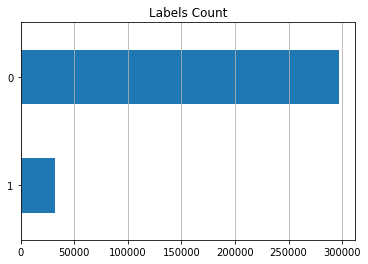

In [ ]:
ax = label_count.sort_values().plot(kind='barh', title='Labels Count')
ax.grid(axis="x")

2.2. Null value check

In [ ]:
model_all_data.isna().sum()

user_id                                     0
product_id                                  0
order_number                                0
order_dow                                   0
order_hour_of_day                           0
days_since_prior_order                  29995
user_product__total_orders                  0
user_product__add_to_cart_order_mean        0
user_product__reordered_mean                0
user_product__most_dow                      0
user_product__most_hod                      0
product__total_orders                       0
product__add_to_cart_order_mean             0
product__total_users                        0
product__reordered_mean                     0
product__most_dow                           0
product__most_hod                           0
product__days_since_prior_order_mean      726
user__order_count                           0
user__product_count                         0
user__days_since_prior_order_mean           0
user__reordered_mean              

2.3. Categorical Feature Transformation

In [ ]:
# One-hot encoding for the `product__department_id` feature.
model_all_data = pd.concat(
    [model_all_data.drop('product__department_id',axis=1),
     pd.get_dummies(model_all_data["product__department_id"],
                    prefix='product__department_id_')],
                     axis=1)

# 3. Split Dataset to Train, Validation and Test

In order to do model training, model selection and evaluation, we split `model_all_data` to three parts: train, validation, test.

In [ ]:
# We randomly select 20% users as test data. 
# The remaining data will be used as train & validation data.
test_user_ids = model_all_data.user_id.drop_duplicates().sample(frac=0.2)  #drop dupicate 谨慎！！！

train_validation_data = model_all_data[~model_all_data.user_id.isin(test_user_ids)] #前面的～是去没有的意思，反取，is not in
test_data = model_all_data[model_all_data.user_id.isin(test_user_ids)]

In [ ]:
model_all_data.shape

(329806, 47)

In [ ]:
train_validation_data.shape

(259451, 47)

In [ ]:
test_data.shape

(70355, 47)

# 4. Model Selection with Cross Validation

4.1. Model Selection with All Features

In [ ]:
train_validation_data_x = train_validation_data.drop(['user_id', 'product_id', 'label'],axis=1)
train_validation_data_y = train_validation_data['label']

In [ ]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ]

In [ ]:
def build_ml_pipeline(classifier):
  steps = list()
  steps.append(('fillnan', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0.0)))
  steps.append(('downSample', RandomUnderSampler()))
  steps.append(('scaler', MinMaxScaler()))
  steps.append(('model', classifier))
  pipeline = Pipeline(steps=steps)
  return pipeline

In [ ]:
# 如何解释model performance (or model selection)
# 1. Accuracy -> F1 score
# 2. Latency -> 代表模型复杂度
# 3. 可解释性

# 解决办法 -> multi-tasks, 确保模型虽然复杂但是精确度高。具体情况具体分析。

for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x, train_validation_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')

CPU times: user 9.96 s, sys: 3.85 s, total: 13.8 s
Wall time: 7.99 s
LogisticRegression : F1 value is 34.574 (2.258)
CPU times: user 6.66 s, sys: 107 ms, total: 6.77 s
Wall time: 6.67 s
DecisionTreeClassifier : F1 value is 24.797 (1.106)
CPU times: user 59.8 s, sys: 349 ms, total: 1min
Wall time: 59.9 s
RandomForestClassifier : F1 value is 33.729 (2.716)
CPU times: user 27.4 s, sys: 221 ms, total: 27.6 s
Wall time: 28 s
AdaBoostClassifier : F1 value is 34.366 (3.079)
CPU times: user 1min 34s, sys: 199 ms, total: 1min 34s
Wall time: 1min 34s
GradientBoostingClassifier : F1 value is 35.013 (2.995)


4.2. Feature Selection

In [ ]:
# Use all data - "train_validation_data_x" - 重算一次，没有 hyperparameter tuning。

pipeline = build_ml_pipeline(GradientBoostingClassifier())
pipeline.fit(train_validation_data_x, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model', GradientBoostingClassifier())])

In [ ]:
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x.columns.tolist()

In [ ]:
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
top15_features = df_importances.head(15)    

In [ ]:
# Only use the selected top 15 features in our training data.
train_validation_data_x_select_features = train_validation_data_x[top15_features['feature']]

In [ ]:
top15_features
#一般选15个feature真的够多！

,feature,importance
6,user_product__reordered_mean,0.308838
16,user__order_count,0.283397
4,user_product__total_orders,0.207298
0,order_number,0.075358
12,product__reordered_mean,0.072252
19,user__reordered_mean,0.016246
3,days_since_prior_order,0.006965
9,product__total_orders,0.006196
17,user__product_count,0.005631
10,product__add_to_cart_order_mean,0.003735


4.3. Train Neural Network Model

In [ ]:
# Feed forward neural network
def create_model():
    model = keras.Sequential([
        ### layer input
        keras.layers.Dense(30, input_dim=15, activation='relu'),
        ###  layer 1
        keras.layers.Dense(15, activation='relu'),
        ###  layer 2
        keras.layers.Dense(5, activation='relu'),
        ### layer output
        keras.layers.Dense(units=1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

In [ ]:
# wrap the model using the function you created
NN_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=32, verbose=0)

In [ ]:
keras_model = create_model()

In [ ]:
print(keras_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                480       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________
None


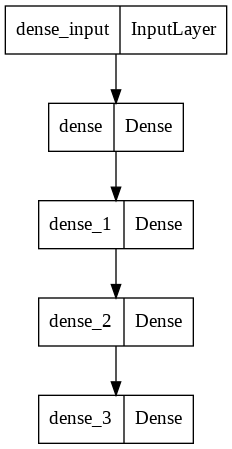

In [ ]:
plot_model(keras_model)

4.4. (Optional) Model Selection with Selected Top 15 Features including Neural Network Model

In [ ]:
# Add our neural network model to our classifiers list.
classifiers.append(NN_model)

In [ ]:
for classifier in classifiers:
  pipeline = build_ml_pipeline(classifier)
  %time scores = cross_val_score(pipeline, train_validation_data_x_select_features, train_validation_data_y, cv=5, scoring='f1')
  print(classifier.__class__.__name__, ': F1 value is %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
  print('==============')



  # NN_model：
  # F1 = 34.941, slightly lower than gradient boost of 35.177. But, the variance of the NN_model F1 is 1.284.

CPU times: user 4.75 s, sys: 2.78 s, total: 7.53 s
Wall time: 4.23 s
LogisticRegression : F1 value is 34.631 (2.289)
CPU times: user 4.16 s, sys: 103 ms, total: 4.26 s
Wall time: 4.16 s
DecisionTreeClassifier : F1 value is 24.776 (1.216)
CPU times: user 53.1 s, sys: 247 ms, total: 53.3 s
Wall time: 53.1 s
RandomForestClassifier : F1 value is 33.647 (2.739)
CPU times: user 17.9 s, sys: 124 ms, total: 18 s
Wall time: 18 s
AdaBoostClassifier : F1 value is 34.329 (2.853)
CPU times: user 59.1 s, sys: 146 ms, total: 59.3 s
Wall time: 59.5 s
GradientBoostingClassifier : F1 value is 35.091 (3.112)
CPU times: user 11min 35s, sys: 57.4 s, total: 12min 32s
Wall time: 9min 53s
KerasClassifier : F1 value is 35.367 (1.499)


# 6. Hyper-parameter tuning for GradientBoostingClassifier

**注意：由于google colab平台运算能力的限制，我们在这里只使用原数据的5%进行hyper-paremter tuning。感兴趣的同学可以尝试在自己的个人电脑上运行代码，并使用完整数据进行参数优化工作。**

In [ ]:
sample_user_ids = train_validation_data.user_id.drop_duplicates().sample(frac=0.05)
train_validation_data_sample = train_validation_data[train_validation_data.user_id.isin(sample_user_ids)]

In [ ]:
train_validation_data_sample_x = train_validation_data_sample.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
train_validation_data_sample_y = train_validation_data_sample['label']

In [ ]:
#这里的parameters会根据最后选择的model变！不同model会tune不同的parameter
param_grid = {
    'model__n_estimators': [100,150],
    'model__max_depth': [4,6],
    'model__min_samples_split': [2,4,6],
    'model__learning_rate': [0.005, 0.01],
}

In [ ]:
grid = GridSearchCV(build_ml_pipeline(GradientBoostingClassifier()), cv=5, param_grid=param_grid, scoring='f1')
grid.fit(train_validation_data_sample_x, train_validation_data_sample_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('fillnan',
                                        SimpleImputer(fill_value=0.0,
                                                      strategy='constant')),
                                       ('downSample', RandomUnderSampler()),
                                       ('scaler', MinMaxScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.005, 0.01],
                         'model__max_depth': [4, 6],
                         'model__min_samples_split': [2, 4, 6],
                         'model__n_estimators': [100, 150]},
             scoring='f1')

In [ ]:
print("Best F1 value is %.3f" % grid.best_score_)
print("Params are %s" % grid.best_params_)

Best F1 value is 0.324
Params are {'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__min_samples_split': 6, 'model__n_estimators': 150}


# 7. Train the final GradientBoostingClassifier

7.1. Train the final model with all training+validation data and the best hyper-parameters.

In [ ]:
pipeline = build_ml_pipeline(GradientBoostingClassifier(
    n_estimators=100,
    min_samples_split=2,
    max_depth=4,
    learning_rate=0.005,
))

pipeline.fit(train_validation_data_x_select_features, train_validation_data_y)

Pipeline(steps=[('fillnan', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('downSample', RandomUnderSampler()),
                ('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.005, max_depth=4))])

In [ ]:
importances = pipeline.steps[3][1].feature_importances_
feature_names=train_validation_data_x_select_features.columns.tolist()
df_importances = pd.DataFrame(
    {"feature":feature_names, "importance":importances}).sort_values("importance", ascending=False)
df_importances.head(15)
#已经train好的model，再跑feature importance就有business value！！！
#这跟之前选model时的feature importance已经变了

,feature,importance
0,user_product__reordered_mean,0.321595
2,user_product__total_orders,0.316425
1,user__order_count,0.298607
4,product__reordered_mean,0.037737
3,order_number,0.024113
7,product__total_orders,0.001524
5,user__reordered_mean,0.000000
6,days_since_prior_order,0.000000
8,user__product_count,0.000000
9,product__add_to_cart_order_mean,0.000000


# 8. Evaluate model on Test Data

8.1. Predict product reorder on Test Data

In [ ]:
test_data_x_selected_features = test_data.drop(['user_id', 'product_id', 'label'],axis=1)[top15_features['feature']]
test_data_y = test_data['label']

In [ ]:
predict_y = pipeline.predict(test_data_x_selected_features)

In [ ]:
df_output = pd.DataFrame(
    {"user_id":test_data.user_id, "product_id":test_data.product_id, "predict":predict_y, "label":test_data.label})   

In [ ]:
df_output.head()

,user_id,product_id,predict,label
0,152610,30597,1,0
1,152610,15221,1,0
2,152610,43772,0,0
3,152610,37886,0,0
4,152610,37215,0,0


In [ ]:
predict_y_prob = pipeline.predict_proba(test_data_x_selected_features)[:,1]

8.2. Analyze classification result

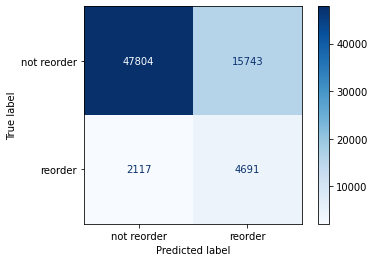

In [ ]:
plot_confusion_matrix(pipeline, test_data_x_selected_features, test_data_y,
                      display_labels=["not reorder","reorder"],cmap=plt.cm.Blues)

In [ ]:
acc = accuracy_score(test_data_y, predict_y)
f1 = f1_score(test_data_y, predict_y)
pre = precision_score(test_data_y, predict_y)
rec = recall_score(test_data_y, predict_y)
auc = roc_auc_score(test_data_y, predict_y_prob)

In [ ]:
print("Model evaluation result on test data: ")
print("F1 Score : {:.4%}".format(f1))
print("ROC AUC : {:.4%}".format(auc))
print("Accuracy : {:.4%}".format(acc))
print("Precision : {:.4%}".format(pre))
print("Recall : {:.4%}".format(rec))

Model evaluation result on test data: 
F1 Score : 34.4395%
ROC AUC : 79.8531%
Accuracy : 74.6145%
Precision : 22.9568%
Recall : 68.9042%


In [ ]:
#这里是classifier的问题不能用accuracy，要用F1score！！